In [1]:
# 基础数据分析包
#!pip install seaborn
# 时间序列分析包
#!pip install statsmodels
# 机器学习包
#!pip install scikit-learn

In [2]:
# pip list

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
print("所有包安装成功！")

所有包安装成功！


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [5]:
# 读取数据（这里我们下载好文件了，下载见连接）
'''confirmed = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")'''

confirmed = pd.read_csv("covid_data/confirmed_global.csv")
deaths = pd.read_csv("covid_data/deaths_global.csv")
recovered = pd.read_csv("covid_data/recovered_global.csv")

In [6]:
# 查看数据的头部
confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


In [7]:
deaths.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


In [8]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recovered.iloc[140:145, :110]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
140,NaN,Jamaica,18.109600,-77.297500,0,0,0,0,0,0,...,29,29,29,29,31,33,38,38,56,57
141,NaN,Japan,36.204824,138.252924,0,0,0,0,1,1,...,1899,1899,2368,2460,2975,3205,3981,4156,4496,4496
142,NaN,Jordan,31.240000,36.510000,0,0,0,0,0,0,...,342,348,356,362,364,367,367,370,375,377
143,NaN,Kazakhstan,48.019600,66.923700,0,0,0,0,0,0,...,720,774,819,866,922,985,1084,1173,1279,1408
144,NaN,Kenya,-0.023600,37.906200,0,0,0,0,0,0,...,114,124,129,144,150,152,167,173,182,190


In [10]:
# 按照字典搜索
confirmed.iloc[50:55, 0:2]

,Province/State,Country/Region
50,Ontario,Canada
51,Prince Edward Island,Canada
52,Quebec,Canada
53,Repatriated Travellers,Canada
54,Saskatchewan,Canada


In [11]:
# 查看确诊数据维度
print("确诊数据维度:", confirmed.shape)  # 输出 (行数, 列数)
# 查看死亡数据维度
print("死亡数据维度:", deaths.shape)
# 查看康复数据维度
print("康复数据维度:", recovered.shape)

确诊数据维度: (289, 1147)
死亡数据维度: (289, 1147)
康复数据维度: (274, 1147)


In [12]:
# 行列转置
def clean_data(df):
    # 划分为日期行和字段行
    date_columns = [
        col for col in df.columns if re.match(r"\d{1,2}/\d{1,2}/\d{2}", col)] 
    
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df = df[id_vars + date_columns]
    
    df = df.melt(
        id_vars=id_vars,
        var_name='Date',
        value_name='Cases'
    )
    # 日期转换格式    
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
    df['Cases'] = df['Cases'].fillna(0).astype(int)

    # 数据整合，按照国家和日期从新排序
    return df.groupby(['Country/Region', 'Date']).agg({'Cases': 'sum'}).reset_index()

In [13]:
# 数据清洗
confirmed_clean = clean_data(confirmed).rename(columns={'Cases': 'Confirmed'})
deaths_clean = clean_data(deaths).rename(columns={'Cases': 'Deaths'})
recovered_clean = clean_data(recovered).rename(columns={'Cases': 'Recovered'})

# 合并数据
df = pd.merge(confirmed_clean, deaths_clean, on=['Country/Region', 'Date'])
df = pd.merge(df, recovered_clean, on=['Country/Region', 'Date'], how='left')

In [14]:
df.iloc[110:120, :]

,Country/Region,Date,Confirmed,Deaths,Recovered
110,Afghanistan,2020-05-11,4664,120,558
111,Afghanistan,2020-05-12,4967,127,610
112,Afghanistan,2020-05-13,4967,127,648
113,Afghanistan,2020-05-14,5339,136,691
114,Afghanistan,2020-05-15,6053,153,745
115,Afghanistan,2020-05-16,6402,168,745
116,Afghanistan,2020-05-17,6635,169,778
117,Afghanistan,2020-05-18,7072,173,801
118,Afghanistan,2020-05-19,7655,177,850
119,Afghanistan,2020-05-20,8145,187,930


In [15]:
#计算每日新增确诊：diff()直接计算行差，第一行为None
df['Daily_Confirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
df['Mortality_Rate'] = df['Deaths']/df['Confirmed'].replace(0, 1)
df['Recovery_Rate'] = df['Recovered']/df['Confirmed'].replace(0, 1)
df.iloc[150:155, :]

,Country/Region,Date,Confirmed,Deaths,Recovered,Daily_Confirmed,Mortality_Rate,Recovery_Rate
150,Afghanistan,2020-06-20,28383,552,8292,419.0,0.019448,0.292147
151,Afghanistan,2020-06-21,28919,585,8764,536.0,0.020229,0.303053
152,Afghanistan,2020-06-22,29229,602,8841,310.0,0.020596,0.302474
153,Afghanistan,2020-06-23,29567,622,9260,338.0,0.021037,0.313187
154,Afghanistan,2020-06-24,29726,643,9869,159.0,0.021631,0.331999


In [16]:
# 查看所有国家字段
unique_contrise = df['Country/Region'] .unique()
unique_contrise

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

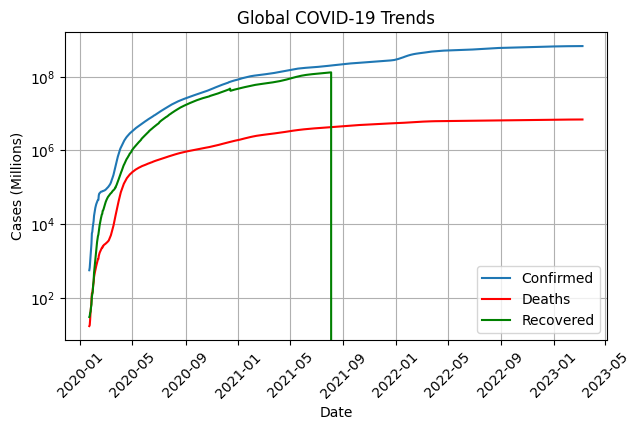

In [17]:
# 全球累计确诊趋势
global_df = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

plt.figure(figsize=(7, 4))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths', color='red')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Trends')
#建立对数坐标，消除量级差距过大带来的影响
plt.yscale('log')
# 旋转角度显示完整
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Cases (Millions)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
start_day = '2021-08-01'
end_day = '2021-08-7'
mask = (global_df['Date']<= end_day) & (global_df['Date']>=start_day)
global_df[mask]

,Date,Confirmed,Deaths,Recovered
557,2021-08-01,198872752,4254020,129994389
558,2021-08-02,199443855,4262171,130277533
559,2021-08-03,200078130,4272524,130582001
560,2021-08-04,200758588,4283016,130899061
561,2021-08-05,201444210,4294008,0
562,2021-08-06,202263736,4304479,0
563,2021-08-07,202825005,4313156,0


**由于2021年夏季出现了变种病毒Delta，许多国家暂停更新康复病例的报告**

![经过预测后的图像](./img/Recovered%20Cases%20Forecast.png)

*详细的修改方案转移到-fill-文档查看详细说明*

In [19]:
# 选择几个主要国家进行查看统计
countries = ['US', 'India', 'Brazil', 'France', 'Germany', 'Japan']
df_main = df[df['Country/Region'].isin(countries)]

Random Forest MSE: 432982498.79


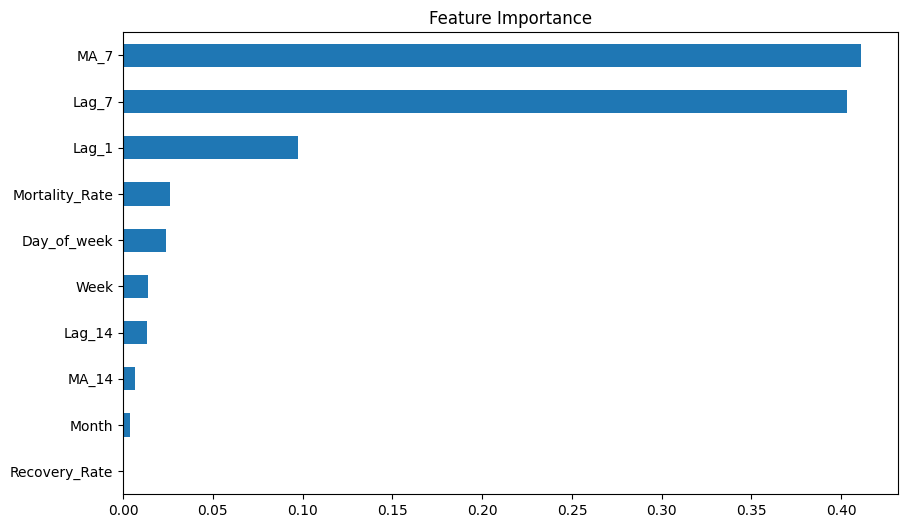

In [20]:
# 切换到没美国的数据
us_df = df[df['Country/Region'] == 'US'].set_index('Date')

# 创建时间特征
us_df['Day_of_week'] = us_df.index.dayofweek
us_df['Month'] = us_df.index.month
us_df['Week'] = us_df.index.isocalendar().week

# 滞后特征
for i in [1, 7, 14]:
    us_df[f'Lag_{i}'] = us_df['Daily_Confirmed'].shift(i)

# 移动平均特征
us_df['MA_7'] = us_df['Daily_Confirmed'].rolling(window=7).mean()
us_df['MA_14'] = us_df['Daily_Confirmed'].rolling(window=14).mean()

# 删除字符串数据(国家那一列)
us_df = us_df.drop(['Country/Region'], axis=1, errors='ignore')

# 准备训练数据
us_df = us_df.dropna()
X = us_df.drop(['Daily_Confirmed', 'Confirmed', 'Deaths', 'Recovered'], axis=1)
y = us_df['Daily_Confirmed']
X_train, X_test = X[:'2022-12-31'], X['2023-01-01':]
y_train, y_test = y[:'2022-12-31'], y['2023-01-01':]

# 训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测和评估
y_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {mse_rf:.2f}')

# 特征重要性
plt.figure(figsize=(10, 6))
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

这里纵坐标的含义分别为:
1. Lag_7（0.25）: 7天前的确诊病例数，重要性最高，说明近期历史数据是最强预测因子  
2. MA_7（0.20）: 7天移动平均值，反映短期趋势  
3. Lag_1（0.15）: 1天前的数据  
4. Week（0.10）: 一年中的第几周，显示季节性影响  
5. Day_of_week（0.08）: 星期几（0=周一，6=周日），反映周末效应  
6. Lag_14（0.07）: 14天前的数据  
7. MA_14（0.05）: 14天移动平均  
8. Month（0.02）: 月份  


1).**时间依赖性**：

过去7天的病例数是预测未来趋势的最佳指标

支持了COVID-19的潜伏期（平均5-6天）理论

2).**短期趋势比长期趋势更重要**：

7天移动平均(MA_7)比14天移动平均(MA_14)重要4倍

表明疫情变化较快，长期历史数据预测价值较低

3).**周周期效应**：

星期几(Day_of_week)有8%的重要性

验证了病例报告的周模式（周末报告较少）

4).**季节性较弱**：

月份(Month)重要性低(2%)

表明COVID-19不像流感那样有强季节性